In [1]:
# importing the required libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt

In [2]:
tel = pd.read_csv('D://classes//Projects//Python//Telco.csv')

In [3]:
tel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
tel.shape

(7043, 21)

In [5]:
tel.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
tel.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
tel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can see that we have many categorical variables and also we need to conver the column types so that we can analyze them`

# Data Cleaning

In [8]:
tel['Churn'].value_counts()/len(tel['Churn'])*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

we can see that around 26% of customers are churning 

Le's see them in graph

<function matplotlib.pyplot.show(close=None, block=None)>

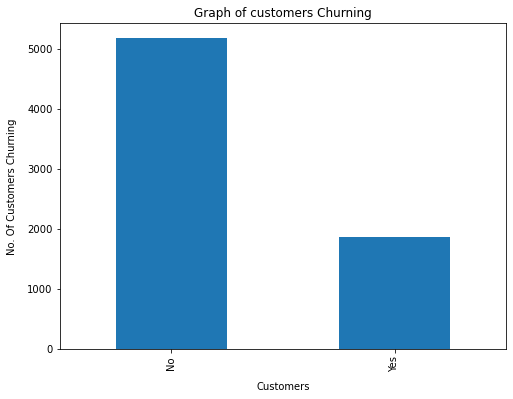

In [9]:
tel['Churn'].value_counts().plot(kind = 'bar', figsize = (8,6))
plt.xlabel('Customers', labelpad = 10)
plt.ylabel('No. Of Customers Churning', labelpad = 10) # labelpad is the padding b/w label and values
plt.title('Graph of customers Churning')
plt.show

We can see that this data set is imbalanced and we will proceed accordingly as it can lead to overfitting of data

  *Data set is highly imbalanced, ratio : 73:27 
  
We will analyse the data with other features while taking the target values separately to get some insights 

In [10]:
tel.info(verbose = True)

# As we have many columns we are using verbose = True

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
tel.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values 

We will convert the data type of columns then will again check for null values as after conversion the data might be not there 

In [12]:
telco = tel.copy()

In [13]:
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors = 'coerce')
telco.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can see that Total Charges has 11 null values, so we will treat them

In [14]:
telco.loc[telco['TotalCharges'].isnull() == True]

#Let's check the records of missing values 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


As the null values are very low not even 1% we will ignore them for further processing

In [15]:
telco.dropna(inplace = True)

In [16]:
telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [17]:
telco['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

As we can see that there are many values in tenure and it will be dificult to analyze them with Churn, we will convert them into categories as in one category there will be certain people of similar range tenures

In [18]:
# Group the tenure in the bins of 12 months 

labels = ['{0} - {1}'.format(i, i+11) for i in range (1, 72, 12)]
telco['tenure_group'] = pd.cut(telco.tenure, range(1,80,12), right = False, labels = labels)

In [19]:
telco['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

Now removing the irrelavant columns

In [20]:
# droping the customerID and tenure column 

telco.drop(columns = ['customerID', 'tenure'], axis = 1, inplace = True)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


# Exploratory Data Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

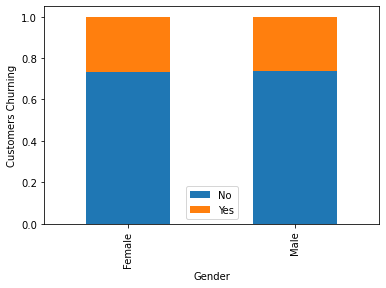

In [21]:
gender = pd.crosstab(telco.gender, telco.Churn)

gender.div(gender.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True)
plt.xlabel('Gender')
plt.ylabel('Customers Churning')
plt.legend()
plt.show

We can run a for loop as well to check the multiple columns 

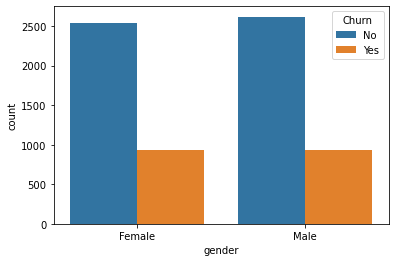

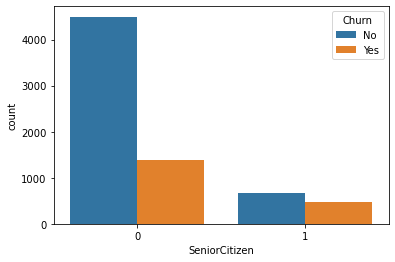

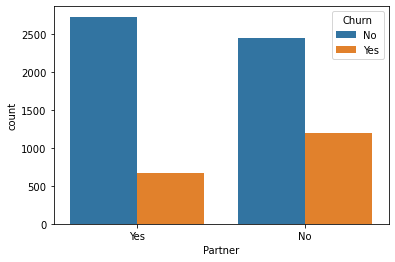

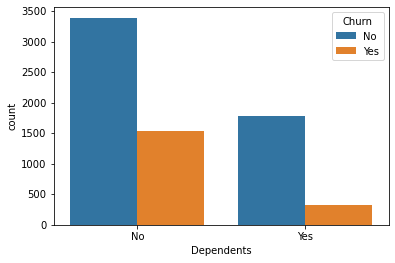

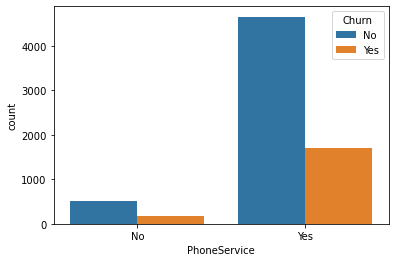

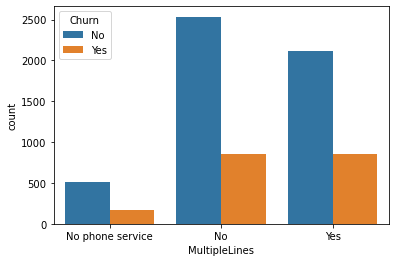

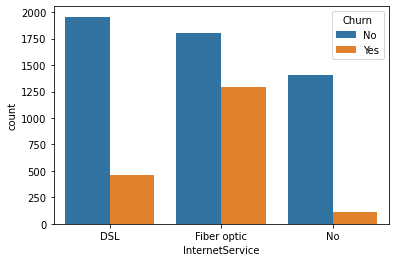

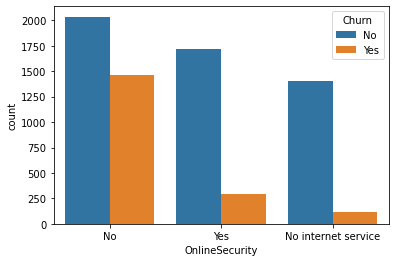

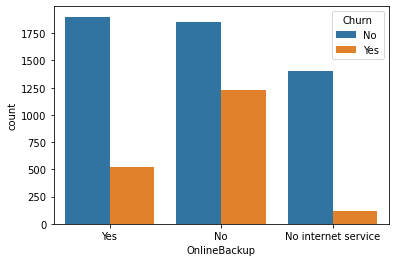

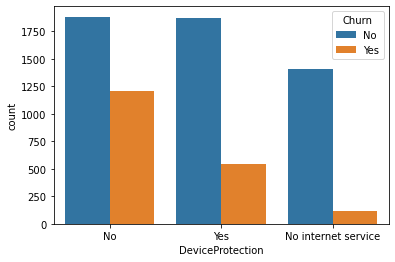

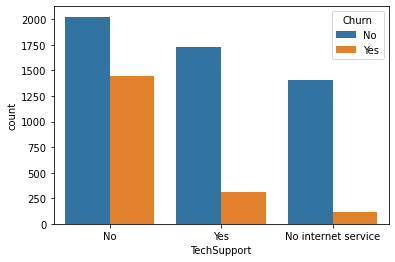

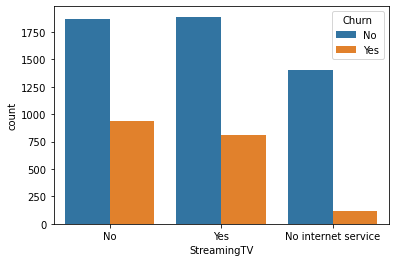

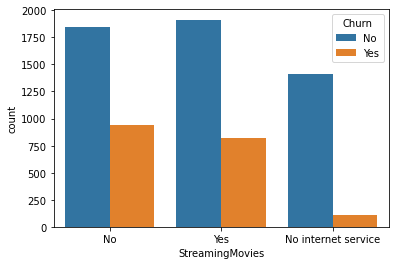

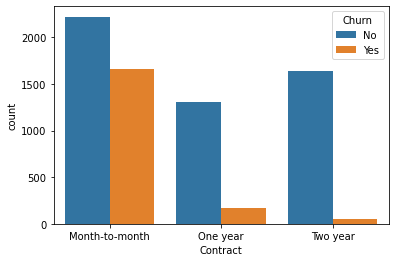

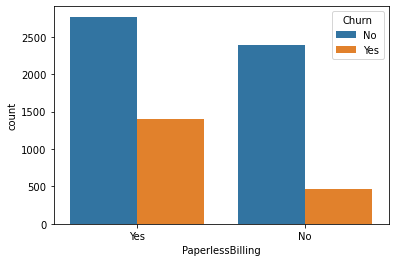

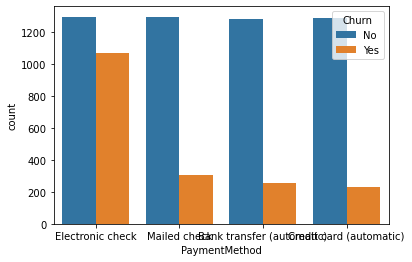

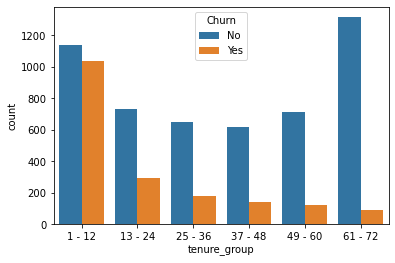

In [22]:
for i, predictor in enumerate(telco.drop(columns = ['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data = telco, x = predictor, hue = 'Churn')

Let's Convert our target variable in categorical numerical data 

In [23]:
telco['Churn'] = np.where(telco.Churn == 'Yes', 1,0)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


Now as we have the Categorical Data, we will convert the variables into dummy variables 

In [24]:
telco_dummies = pd.get_dummies(telco, drop_first = True)
telco_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0


Let's see the relationship b/w Monthly Charges and Total Charges

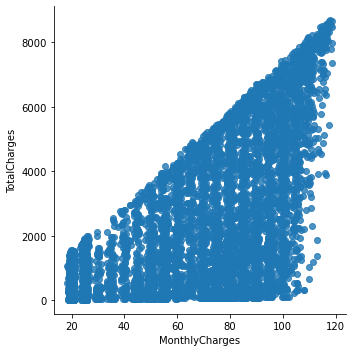

In [25]:
sns.lmplot(data = telco_dummies, x = 'MonthlyCharges', y = 'TotalCharges',fit_reg = False)

Churn by Monthly Charges and Total Charges

Text(0.5, 1.0, 'Monthly Charges by Churn')

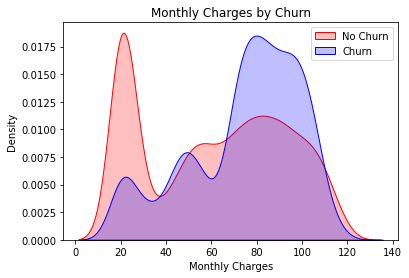

In [26]:
mnth = sns.kdeplot(telco_dummies.MonthlyCharges[(telco_dummies["Churn"] == 0)],color = 'red', shade = True)
mnth = sns.kdeplot(telco_dummies.MonthlyCharges[(telco_dummies["Churn"] == 1)], color = 'blue', shade = True)
mnth.legend(['No Churn','Churn'], loc = 'best')
mnth.set_ylabel('Density')
mnth.set_xlabel('Monthly Charges')
mnth.set_title('Monthly Charges by Churn')

Text(0.5, 1.0, 'Total Charges By Churn')

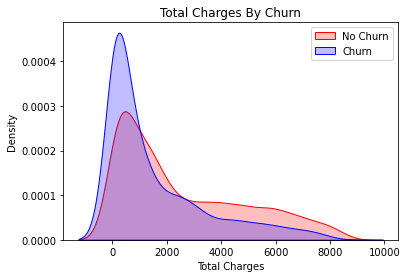

In [27]:
tot = sns.kdeplot(telco_dummies.TotalCharges[(telco_dummies['Churn'] == 0)], color = 'red', shade = True)
tot = sns.kdeplot(telco_dummies.TotalCharges[(telco_dummies['Churn'] == 1)], color = 'blue', shade = True)
tot.legend(['No Churn', 'Churn'], loc = 'best')
tot.set_ylabel('Density')
tot.set_xlabel('Total Charges')
tot.set_title('Total Charges By Churn')

Correlation of all predictors with Churn

<AxesSubplot:>

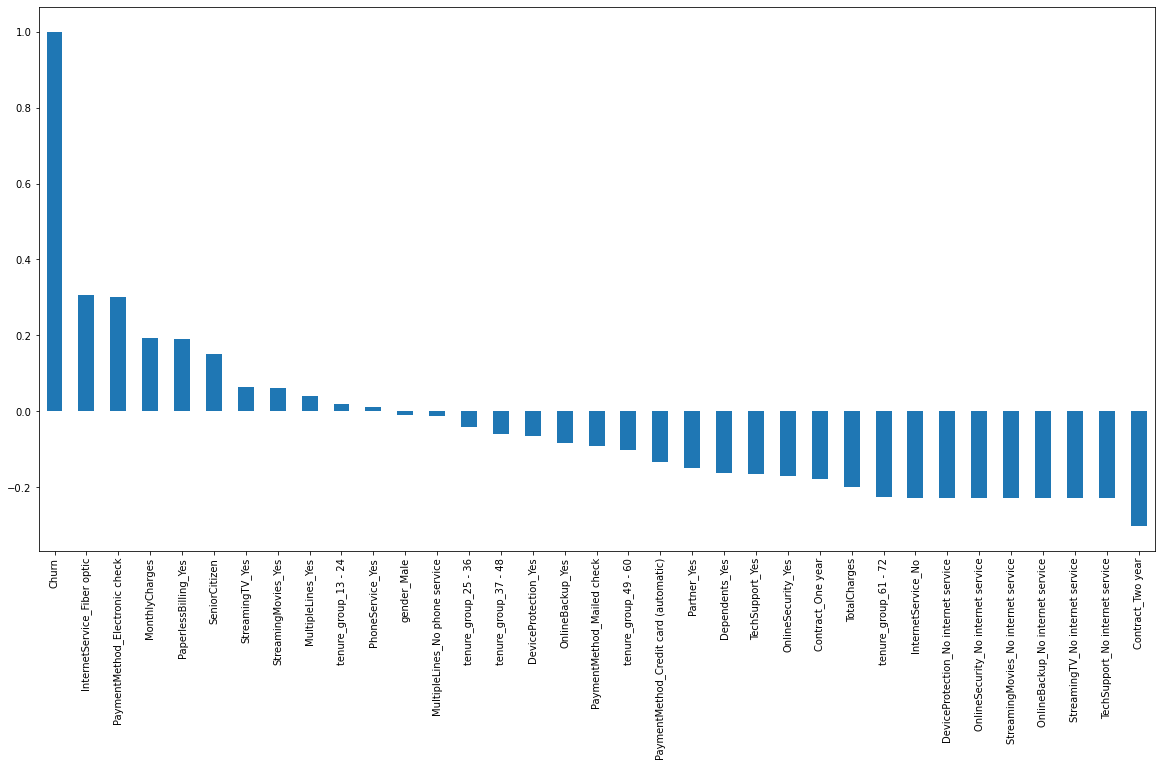

In [28]:
plt.figure(figsize = (20,10))
telco_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

Correlation Matrix

<AxesSubplot:>

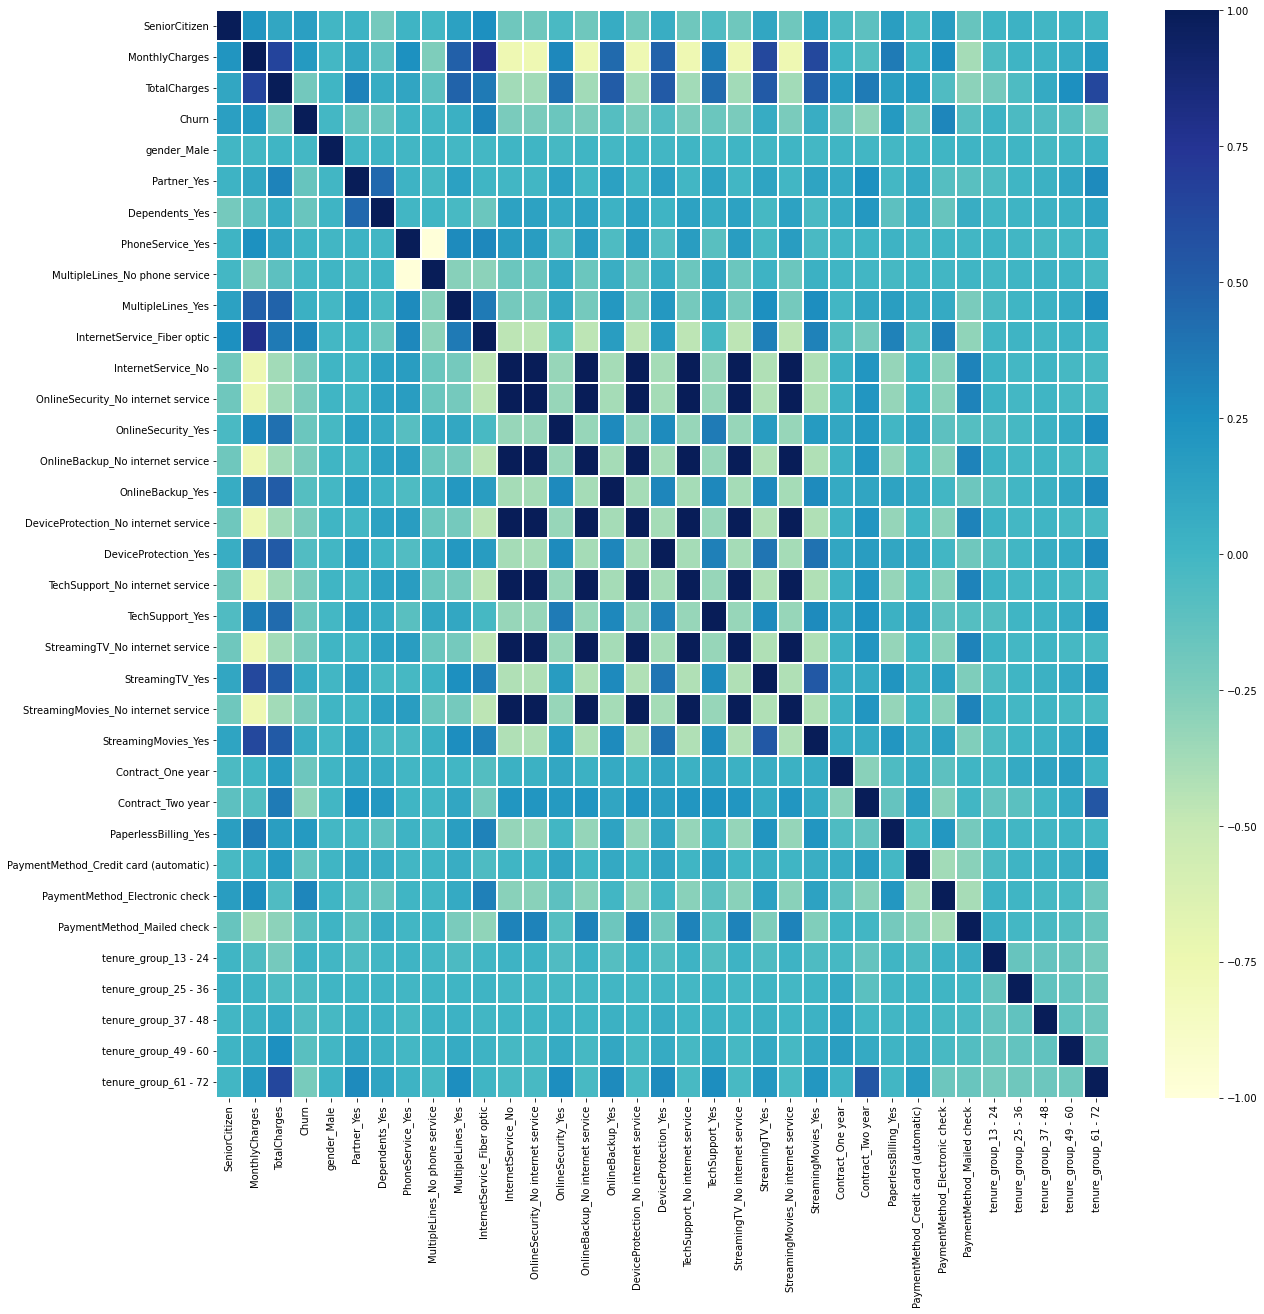

In [29]:
plt.figure(figsize = (20,20))

sns.heatmap(telco_dummies.corr(), cmap = 'YlGnBu', linewidth = 0.2)

## Bi-Variate Analysis

In [30]:
new_df_0 = telco.loc[telco['Churn'] == 0]
new_df_1 = telco.loc[telco['Churn'] == 1]

In [31]:
def uniplot(df, col, title, hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) +7 +4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, palette = 'bright')
    
    plt.show()
    
    

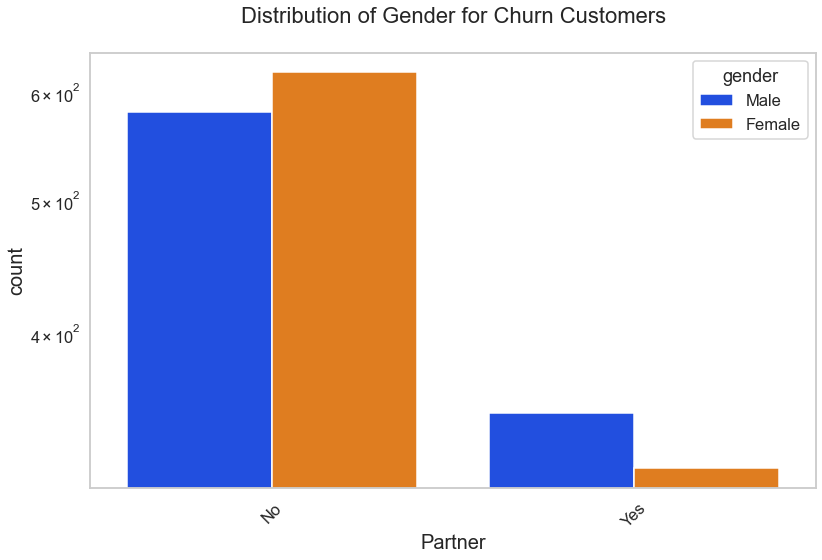

In [32]:
uniplot(new_df_1, col = 'Partner', title = 'Distribution of Gender for Churn Customers', hue = 'gender')

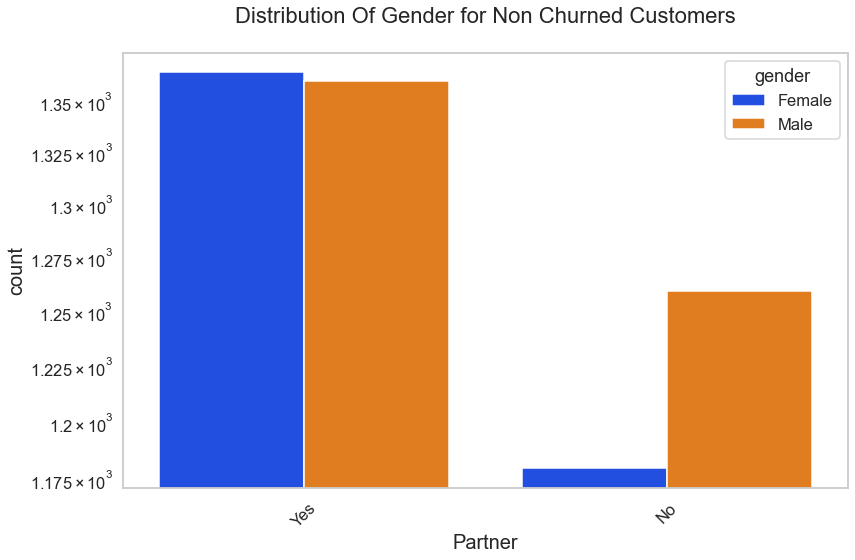

In [33]:
uniplot(new_df_0, col = 'Partner', title = 'Distribution Of Gender for Non Churned Customers', hue = 'gender')

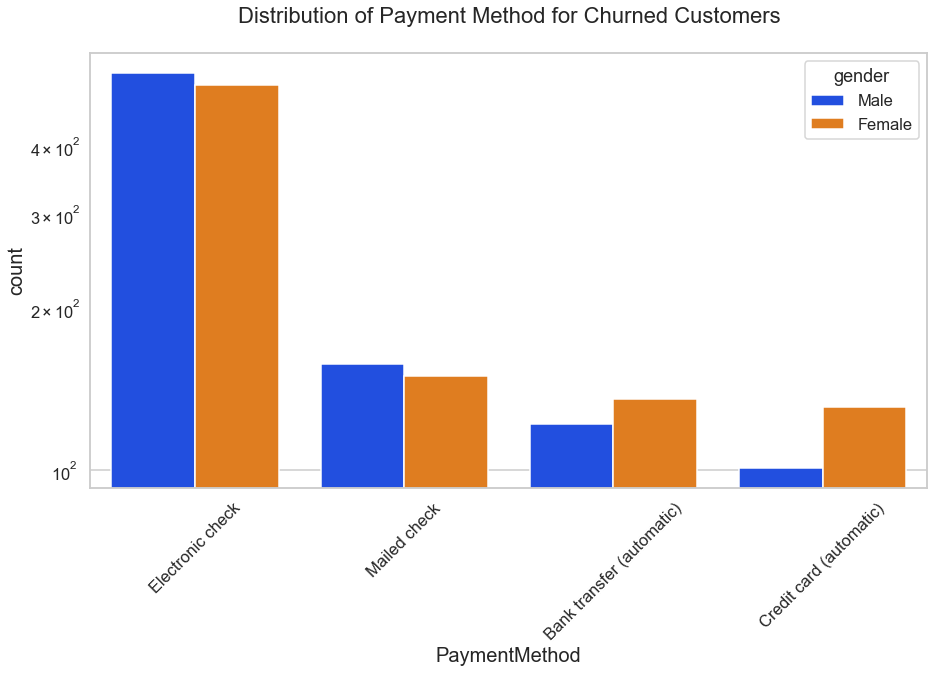

In [34]:
uniplot(new_df_1, col = 'PaymentMethod', title = 'Distribution of Payment Method for Churned Customers', hue = 'gender')

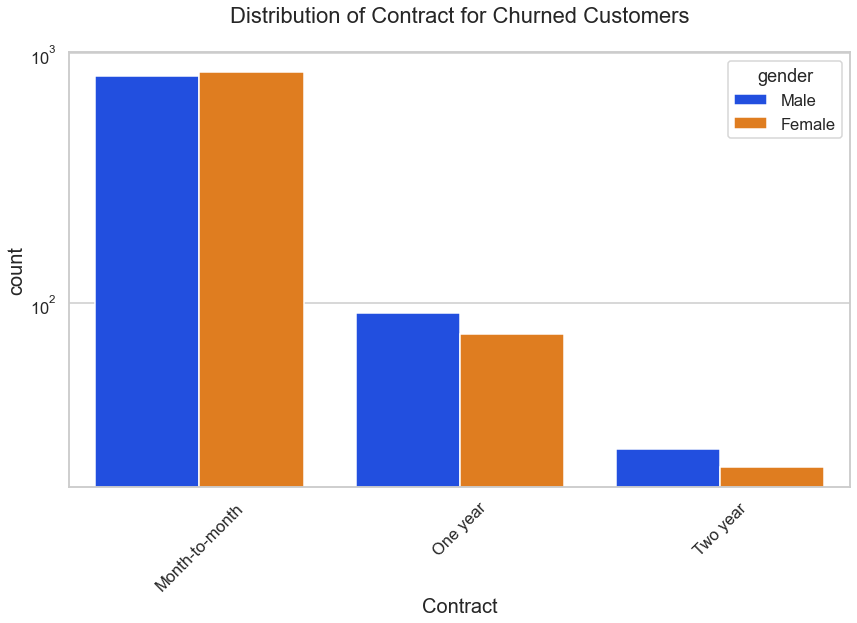

In [35]:
uniplot(new_df_1, col = 'Contract', title = 'Distribution of Contract for Churned Customers', hue = 'gender')

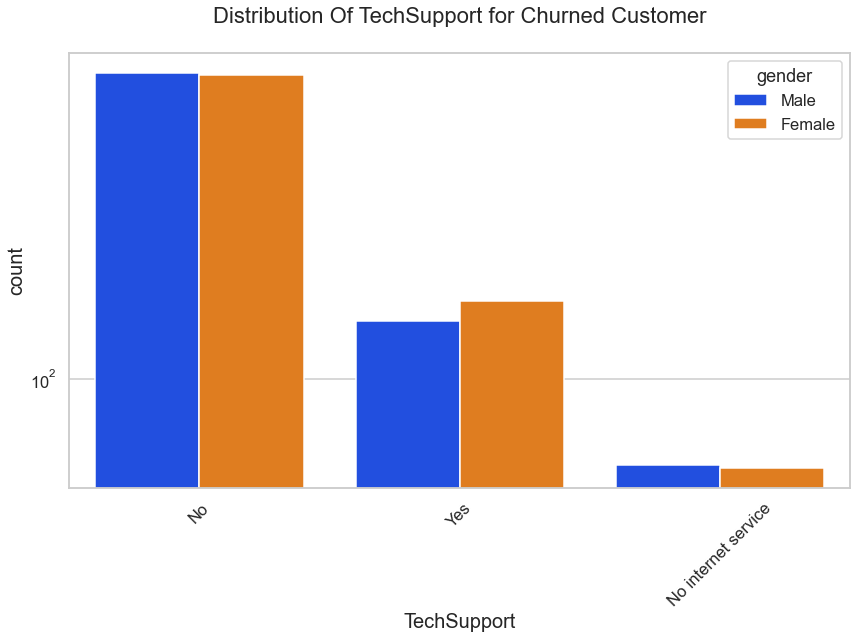

In [36]:
uniplot(new_df_1, col = 'TechSupport', title = 'Distribution Of TechSupport for Churned Customer', hue = 'gender')

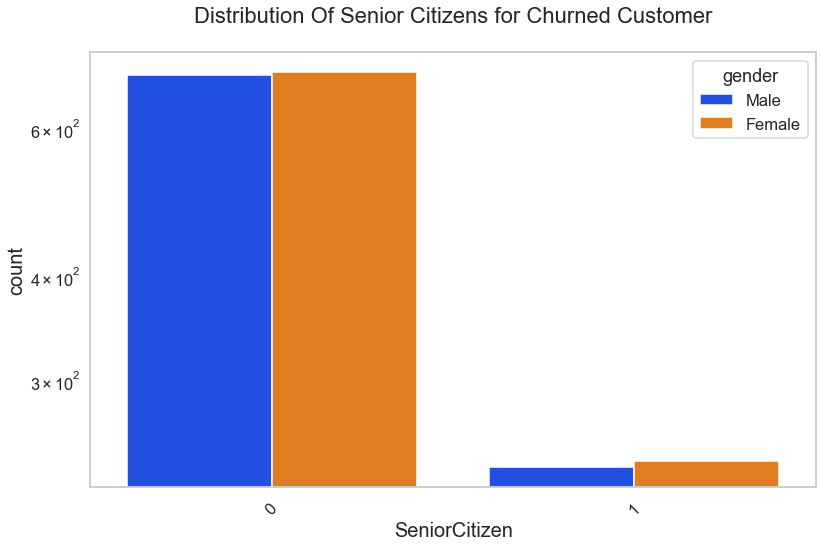

In [37]:
uniplot(new_df_1, col = 'SeniorCitizen', title = 'Distribution Of Senior Citizens for Churned Customer', hue = 'gender')

## Conclusion

Insights: 

1. Electronic Check Medium are the highest Churners
2. People with No Partners ae the Highest Churners 
3. 0 Senior Citizens are the Highest Churners
4. Monthly Contract people are more Churners 
5. No online Support people are more Churners 

In [38]:
telco_dummies.to_csv('tel_churn.csv')

Import libraries for the Model Building

In [39]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [40]:
df = pd.read_csv('D:\\classes\\Projects\\Python\\tel_churn.csv')

In [41]:
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [42]:
df = df.drop('Unnamed: 0', axis = 1)

In [43]:
df.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [44]:
# Creating X and Y variable

x = df.drop('Churn', axis = 1)
print(x)

      SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0                 0           29.85         29.85              1            0   
1                 0           56.95       1889.50              0            1   
2                 0           53.85        108.15              0            1   
3                 0           42.30       1840.75              0            1   
4                 0           70.70        151.65              1            0   
...             ...             ...           ...            ...          ...   
7027              0           84.80       1990.50              0            1   
7028              0          103.20       7362.90              1            0   
7029              0           29.60        346.45              1            0   
7030              1           74.40        306.60              0            1   
7031              0          105.65       6844.50              0            1   

      Partner_No  Partner_Y

In [45]:
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [46]:
y = df['Churn']

In [47]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

## Decision Tree Classifier

In [49]:
model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 6, min_samples_leaf = 8)

In [50]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=0)

In [51]:
pred = model.predict(x_test)

In [52]:
pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [53]:
print(classification_report(y_test, pred, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1038
           1       0.60      0.51      0.55       369

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [54]:
confusion_matrix(y_test, pred)

array([[915, 123],
       [181, 188]], dtype=int64)

In [55]:
sm = SMOTEENN()

In [56]:
x_resampled, y_resampled = sm.fit_resample(x, y)

In [57]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x,y, test_size = 0.3)

In [58]:
model_sm = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 6, min_samples_leaf = 8)

In [59]:
model_sm.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=0)

In [60]:
pred_sm = model_sm.predict(xr_test)

In [61]:
print(classification_report(yr_test, pred_sm, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1532
           1       0.67      0.51      0.58       578

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.78      0.80      0.79      2110



In [62]:
confusion_matrix(yr_test, pred_sm)

array([[1384,  148],
       [ 284,  294]], dtype=int64)

## Random Forest Classifier 

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model_rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0, max_depth = 6, min_samples_leaf = 8)
model_rf.fit(x_train, y_train)
pred_rf = model.predict(x_test)

In [65]:
print(classification_report(y_test, pred_rf, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1038
           1       0.60      0.51      0.55       369

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



In [66]:
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(x, y)
xr_train, xr_test, yr_train, yr_test = train_test_split(x,y, test_size = 0.3)
model_sm_rf = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 0, max_depth = 6, min_samples_leaf = 8)
model_sm_rf.fit(xr_train, yr_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=0)

In [67]:
pred_sm_rf = model_sm_rf.predict(xr_test)

In [68]:
print(classification_report(yr_test, pred_sm, labels = [0,1]))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1552
           1       0.23      0.18      0.20       558

    accuracy                           0.62      2110
   macro avg       0.48      0.48      0.48      2110
weighted avg       0.59      0.62      0.61      2110



## KNN Classifier 

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
Kn_model = KNeighborsClassifier()

In [78]:
Kn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [79]:
Kn_pred = Kn_model.predict(x_test)

In [80]:
print(classification_report(y_test, Kn_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1038
           1       0.56      0.44      0.49       369

    accuracy                           0.76      1407
   macro avg       0.68      0.66      0.67      1407
weighted avg       0.75      0.76      0.75      1407



In [81]:
Kn_model_sm = Kn_model = KNeighborsClassifier()

In [82]:
Kn_model_sm.fit(xr_train, yr_train)

KNeighborsClassifier()

In [85]:
Kn_pred_sm = Kn_model_sm.predict(xr_test)

In [86]:
print(classification_report(yr_test, Kn_pred_sm))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1552
           1       0.56      0.44      0.49       558

    accuracy                           0.76      2110
   macro avg       0.69      0.66      0.67      2110
weighted avg       0.75      0.76      0.75      2110



## The best result that we are getting is from Decision tree so we will move ahead with it

# Saving the Model

In [87]:
import pickle 

In [88]:
 filename = 'Decision_Tree_Telco.sav'

In [89]:
pickle.dump(model_sm, open(filename, 'wb'))

# Loading the model

In [90]:
load_model = pickle.load(open(filename,'rb'))

In [92]:
load_model.score(xr_test, yr_test)

0.7971563981042654